# Week 5 - Vector Space Model (VSM) and Topic Modeling

Over the next weeks, we are going to re-implement Sherin's algorithm and apply it to the text data we've been working on last week! Here's our roadmap:

**Week 6 - vectorization and linear algebra**
6. Dampen: weight the frequency of words (1 + log[count])
7. Scale: Normalize weighted frequency of words
8. Direction: compute deviation vectors

**Week 7 - Clustering**
9. apply different unsupervised machine learning algorithms
    * figure out how many clusters we want to keep
    * inspect the results of the clustering algorithm

**Week 8 - Visualizing the results**
10. create visualizations to compare documents

# WEEK 5 - DATA CLEANING

## Step 1 - Data Retrieval

In [1]:
# using glob, find all the text files in the poe_complete_works folder
import glob

files = glob.glob('./edgar_allan_poe/*.txt')
print(files)

['./edgar_allan_poe/short_stories.txt', './edgar_allan_poe/the_fall_of_the_house_of_usher.txt', './edgar_allan_poe/theraven.txt', './edgar_allan_poe/masque _of_the_red_death.txt', './edgar_allan_poe/cask_of_amontillado.txt']


In [2]:
# get all the data from the text files into the "documents" list
# P.S. make sure you use the 'utf-8' encoding
documents = []

for filename in files: 
    with open (filename, "r", encoding='utf-8', errors='ignore') as f:
        documents.append(f.read())
        
for i, doc in enumerate(documents):
    documents[i] = documents[i].lower()

print(documents[0])

introduction

history of the short-story

just when, where, and by whom story-telling was begun no one can say.
from the first use of speech, no doubt, our ancestors have told
stories of war, love, mysteries, and the miraculous performances of
lower animals and inanimate objects. the ultimate source of all
stories lies in a thorough democracy, unhampered by the restrictions
of a higher civilization. many tales spring from a loathsome filth
that is extremely obnoxious to our present day tastes. the remarkable
and gratifying truth is, however, that the short-story, beginning in
the crude and brutal stages of man's development, has gradually
unfolded to greater and more useful possibilities, until in our own
time it is a most flexible and moral literary form.

the first historical evidence in the development of the story shows no
conception of a short-story other than that it is not so long as other
narratives. this judgment of the short-story obtained until the
beginning of the nineteent

In [3]:
# print the first 1000 characters of the first document to see what it 
# looks like (we'll use this as a sanity check below)
documents[0][:1500]

"introduction\n\nhistory of the short-story\n\njust when, where, and by whom story-telling was begun no one can say.\nfrom the first use of speech, no doubt, our ancestors have told\nstories of war, love, mysteries, and the miraculous performances of\nlower animals and inanimate objects. the ultimate source of all\nstories lies in a thorough democracy, unhampered by the restrictions\nof a higher civilization. many tales spring from a loathsome filth\nthat is extremely obnoxious to our present day tastes. the remarkable\nand gratifying truth is, however, that the short-story, beginning in\nthe crude and brutal stages of man's development, has gradually\nunfolded to greater and more useful possibilities, until in our own\ntime it is a most flexible and moral literary form.\n\nthe first historical evidence in the development of the story shows no\nconception of a short-story other than that it is not so long as other\nnarratives. this judgment of the short-story obtained until the\nbeginn

## Step 2 - Data Cleaning

In [4]:
# only select the text that's between the first occurence of the 
# the word "abstract" and the last occurence of the word "reference"
# Optional: print the length of the string before and after, as a 
# sanity check
# HINT: https://stackoverflow.com/questions/14496006/finding-last-occurrence-of-substring-in-string-replacing-that
# read more about rfind: https://www.tutorialspoint.com/python/string_rfind.htm

# for i,doc in enumerate(documents):
#     print(len(documents[i]), end=' ')
#     # save the result
#     documents[i] = doc
#     # print the length of the resulting string
#     print(len(documents[i]))
    
# one liner:
# documents = [doc[doc.index('abstract'):doc.rfind('reference')] for doc in documents]

# this is unnessary for this data set

In [5]:
# replace carriage returns (i.e., "\n") with a white space
# check that the result looks okay by printing the 
# first 1000 characters of the 1st doc:

documents = [doc.replace('\n', ' ') for doc in documents]
print(documents[0][:1000])

introduction  history of the short-story  just when, where, and by whom story-telling was begun no one can say. from the first use of speech, no doubt, our ancestors have told stories of war, love, mysteries, and the miraculous performances of lower animals and inanimate objects. the ultimate source of all stories lies in a thorough democracy, unhampered by the restrictions of a higher civilization. many tales spring from a loathsome filth that is extremely obnoxious to our present day tastes. the remarkable and gratifying truth is, however, that the short-story, beginning in the crude and brutal stages of man's development, has gradually unfolded to greater and more useful possibilities, until in our own time it is a most flexible and moral literary form.  the first historical evidence in the development of the story shows no conception of a short-story other than that it is not so long as other narratives. this judgment of the short-story obtained until the beginning of the nineteent

In [6]:
# replace the punctation below by a white space
# check that the result looks okay 
# (e.g., by print the first 1000 characters of the 1st doc)

punctuation = ['.', '...', '!', '#', '"', '%', '$', "'", '&', ')', 
               '(', '+', '*', '-', ',', '/', '.', ';', ':', '=', 
               '<', '?', '>', '@', '",', '".', '[', ']', '\\', ',',
               '_', '^', '`', '{', '}', '|', '~', '−', '”', '“', '’']


# remove ponctuation
for i,doc in enumerate(documents): 
    for punc in punctuation: 
        doc = doc.replace(punc, ' ')
    documents[i] = doc
    
print(documents[0][:1000])

introduction  history of the short story  just when  where  and by whom story telling was begun no one can say  from the first use of speech  no doubt  our ancestors have told stories of war  love  mysteries  and the miraculous performances of lower animals and inanimate objects  the ultimate source of all stories lies in a thorough democracy  unhampered by the restrictions of a higher civilization  many tales spring from a loathsome filth that is extremely obnoxious to our present day tastes  the remarkable and gratifying truth is  however  that the short story  beginning in the crude and brutal stages of man s development  has gradually unfolded to greater and more useful possibilities  until in our own time it is a most flexible and moral literary form   the first historical evidence in the development of the story shows no conception of a short story other than that it is not so long as other narratives  this judgment of the short story obtained until the beginning of the nineteent

In [7]:
# remove numbers by either a white space or the word "number"
# again, print the first 1000 characters of the first document
# to check that you're doing the right thing
for i,doc in enumerate(documents): 
    for num in range(10):
        doc = doc.replace(str(num), '')
    documents[i] = doc

print(documents[1][:1000])

the fall of the house of usher     son coeur est un luth suspendu    sitot qu on le touche il resonne      de beranger     during the whole of a dull  dark  and soundless day in the autumn of the year  when the clouds hung oppressively low in the heavens  i had been passing alone  on horseback  through a singularly dreary tract of country  and at length found myself  as the shades of the evening drew on  within view of the melancholy house of usher   i know not how it was  but  with the first glimpse of the building  a sense of insufferable gloom pervaded my spirit   i say insufferable  for the feeling was unrelieved by any of that half pleasureable  because poetic  sentiment  with which the mind usually receives even the sternest natural images of the desolate or terrible   i looked upon the scene before me  upon the mere house  and the simple landscape features of the domain  upon the bleak walls  upon the vacant eye like windows  upon a few rank sedges  and upon a few white trunks o

In [8]:
# Remove the stop words below from our documents
# print the first 1000 characters of the first document
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 
              'ourselves', 'you', 'your', 'yours', 'yourself', 
              'yourselves', 'he', 'him', 'his', 'himself', 'she', 
              'her', 'hers', 'herself', 'it', 'its', 'itself', 
              'they', 'them', 'their', 'theirs', 'themselves', 
              'what', 'which', 'who', 'whom', 'this', 'that', 
              'these', 'those', 'am', 'is', 'are', 'was', 'were', 
              'be', 'been', 'being', 'have', 'has', 'had', 'having', 
              'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 
              'but', 'if', 'or', 'because', 'as', 'until', 'while', 
              'of', 'at', 'by', 'for', 'with', 'about', 'against', 
              'between', 'into', 'through', 'during', 'before', 
              'after', 'above', 'below', 'to', 'from', 'up', 'down', 
              'in', 'out', 'on', 'off', 'over', 'under', 'again', 
              'further', 'then', 'once', 'here', 'there', 'when', 
              'where', 'why', 'how', 'all', 'any', 'both', 'each', 
              'few', 'more', 'most', 'other', 'some', 'such', 'no', 
              'nor', 'not', 'only', 'own', 'same', 'so', 'than', 
              'too', 'very', 's', 't', 'can', 'will', 
              'just', 'don', 'should', 'now']


# remove stop words
for i,doc in enumerate(documents):
    for stop_word in stop_words:
        doc = doc.replace(' ' + stop_word + ' ', ' ')
    documents[i] = doc

print(documents[0][:1000])

introduction  history short story    story telling begun one say  first use speech  doubt  ancestors told stories war  love  mysteries  miraculous performances lower animals inanimate objects  ultimate source stories lies thorough democracy  unhampered restrictions higher civilization  many tales spring loathsome filth extremely obnoxious present day tastes  remarkable gratifying truth  however  short story  beginning crude brutal stages man development  gradually unfolded greater useful possibilities  time flexible moral literary form   first historical evidence development story shows conception short story long narratives  judgment short story obtained beginning nineteenth century  new version meaning given  enlarged vision possibilities experienced number writers almost simultaneously  early centuries story telling one purpose mind  narrating joy telling hearing  story tellers sacrificed unity totality effect well originality entertaining method reciting incidents   story  ruth   p

In [9]:
# remove words with one and two characters (e.g., 'd', 'er', etc.)
# print the first 1000 characters of the first document

for i,doc in enumerate(documents):  
    doc = [x for x in doc.split() if len(x) > 2]
    doc = " ".join(doc)
    documents[i] = doc

print(documents[0][:1000])

introduction history short story story telling begun one say first use speech doubt ancestors told stories war love mysteries miraculous performances lower animals inanimate objects ultimate source stories lies thorough democracy unhampered restrictions higher civilization many tales spring loathsome filth extremely obnoxious present day tastes remarkable gratifying truth however short story beginning crude brutal stages man development gradually unfolded greater useful possibilities time flexible moral literary form first historical evidence development story shows conception short story long narratives judgment short story obtained beginning nineteenth century new version meaning given enlarged vision possibilities experienced number writers almost simultaneously early centuries story telling one purpose mind narrating joy telling hearing story tellers sacrificed unity totality effect well originality entertaining method reciting incidents story ruth prodigal son excellent short tale


### Putting it all together

In [10]:
# package all of your work above into a function that cleans a given document

def clean_list_of_documents(documents):
    
    cleaned_docs = []

    for i,doc in enumerate(documents):
        # only keep the text after the abstract
        # doc = doc[doc.index('abstract'):]
        # only keep the text before the references
        # doc = doc[:doc.rfind('reference')]
        # replace return carriage with white space
        doc = doc.replace('\n', ' ')
        # remove ponctuation
        for punc in punctuation: 
            doc = doc.replace(punc, ' ')
        # remove numbers
        for i in range(10):
            doc = doc.replace(str(i), ' ')
        # remove stop words
        for stop_word in stop_words:
            doc = doc.replace(' ' + stop_word + ' ', ' ')
        # remove single characters and stem the words 
        doc = [x for x in doc.split() if len(x) > 2]
        doc = " ".join(doc)
        # save the result to our list of documents
        cleaned_docs.append(doc)
        
    return cleaned_docs

In [11]:
# reimport your raw data
documents = []

for filename in files: 
    with open (filename, "r", encoding='utf-8', errors='ignore') as f:
        documents.append(f.read())
        
for i, doc in enumerate(documents):
    documents[i] = documents[i].lower()
        
# clean your files using the function above
docs = clean_list_of_documents(documents)

# print the first 1000 characters of the first document
print(docs[0][:1000])

introduction history short story story telling begun one say first use speech doubt ancestors told stories war love mysteries miraculous performances lower animals inanimate objects ultimate source stories lies thorough democracy unhampered restrictions higher civilization many tales spring loathsome filth extremely obnoxious present day tastes remarkable gratifying truth however short story beginning crude brutal stages man development gradually unfolded greater useful possibilities time flexible moral literary form first historical evidence development story shows conception short story long narratives judgment short story obtained beginning nineteenth century new version meaning given enlarged vision possibilities experienced number writers almost simultaneously early centuries story telling one purpose mind narrating joy telling hearing story tellers sacrificed unity totality effect well originality entertaining method reciting incidents story ruth prodigal son excellent short tale

## Step 3 - Build your list of vocabulary

This list of words (i.e., the vocabulary) is going to become the columns of your matrix.

In [12]:
import math
import numpy as np

In [13]:
# create a function that takes in a list of documents
# and returns a set of unique words. Make sure that you
# sort the list alphabetically before returning it. 

def get_vocabulary(docs):
    voc = []
    for doc in docs:
        for word in doc.split():
            if word not in voc: 
                voc.append(word)
    voc = list(set(voc))
    voc.sort()
    return voc

# Then print the length of your vocabulary (it should be 
# around 5500 words)
vocabulary = get_vocabulary(docs)
print(len(vocabulary))

9477


## Step 4 - transform your documents in to 100-words chunks

In [14]:
# create a function that takes in a list of documents
# and returns a list of 100-words chunk 
# (with a 25 words overlap between them)
# Optional: add two arguments, one for the number of words
# in each chunk, and one for the overlap

def flatten_and_overlap(docs, window_size=100, overlap=25):
    
    # create the list of overlapping documents
    new_list_of_documents = []
    
    # flatten everything into one string
    flat = ""
    for doc in docs:
        flat += doc
    
    # split into words
    flat = flat.split()

    # create chunks of 100 words
    high = window_size
    while high < len(flat):
        low = high - window_size
        new_list_of_documents.append(flat[low:high])
        high += overlap
    return new_list_of_documents

chunks = flatten_and_overlap(docs)

In [15]:
# create a for loop to double check that each chunk has 
# a length of 100
# Optional: use assert to do this check
for chunk in chunks: 
    assert(len(chunk) == 100)
    
print(len(chunks))

1719


# WEEK 6 - VECTOR MANIPULATION

## Step 5 - Create a word by document matrix

In [16]:
# 1) create an empty dataframe using pandas
# the number of rows should be the number of chunks we have
# the number of columns should be size of the vocabulary
import pandas as pd
df = pd.DataFrame(0, index=np.arange(len(chunks)), columns=vocabulary)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1719 entries, 0 to 1718
Columns: 9477 entries, abandon to zola
dtypes: int64(9477)
memory usage: 124.3 MB


In [17]:
print(vocabulary)

['abandon', 'abandoned', 'abbey', 'abbeys', 'aberration', 'abeyance', 'abhorrence', 'abhorrent', 'abide', 'ability', 'able', 'abnormal', 'abode', 'abominable', 'abortive', 'abound', 'abroad', 'abrupt', 'abruptly', 'absconded', 'absence', 'absent', 'absolute', 'absolutely', 'absorbed', 'absorbing', 'abstracted', 'abstraction', 'abstractions', 'abstractly', 'abstruse', 'abstruseness', 'absurd', 'absurdity', 'academy', 'accelerate', 'accents', 'accept', 'accepted', 'access', 'accessory', 'accident', 'accidents', 'accompanied', 'accompany', 'accompanying', 'accomplice', 'accomplished', 'accomplishing', 'accordance', 'according', 'accordingly', 'accosted', 'account', 'accounted', 'accounting', 'accoutrement', 'accredited', 'accumulations', 'accuracy', 'accurately', 'accursed', 'accused', 'accusing', 'accustomed', 'ache', 'aches', 'achieve', 'achieved', 'achievement', 'achievements', 'acid', 'acids', 'acknowledge', 'acknowledged', 'acknowledgment', 'acme', 'acquaintance', 'acquaintances', 'a

In [18]:
# 2) fill out the dataframe with the count of words for each document
# (use two for loops to iterate through the documents and the vocabulary)
for i,chunk in enumerate(chunks):
    for word in chunk:
        if word in df.columns: 
            df.loc[i,word] += 1

In [22]:
# 3) Sanity check: make sure that your counts are correct
# (e.g., if you know that a words appears often in a document, check that
# the number is also high in your dataframe; and vice-versa for low counts)
df.loc[0,'story']

7

In [23]:
# 4) Putting it together: create a function that takes a list of documents
# and a vocabulary as arguments, and returns a dataframe with the counts
# of words: 
def docs_by_words_df(chunks, vocabulary):
    df = pd.DataFrame(0, index=np.arange(len(chunks)), columns=vocabulary)
    
    # fill out the matrix with counts
    for i,chunk in enumerate(chunks):
        for word in chunk:
            if word in df.columns: 
                df.loc[i,word] += 1
            
    return df

# call the function and check that the resulting dataframe is correct
df = docs_by_words_df(chunks, vocabulary)
df.loc[0,'story']

7

## Step 6 - Weight word frequency

In [24]:
df.head()

,abandon,abandoned,abbey,abbeys,aberration,abeyance,abhorrence,abhorrent,abide,ability,...,younger,youngest,youth,youthful,yvetot,zaffre,zeal,zhigansk,zigzag,zola
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# 5) create a function that adds one to the current cell and takes its log
# IF the value in the cell is not zero
def one_plus_log(cell):
    if cell != 0: 
        return 1 + math.log(cell)
    else:
        return 0

In [26]:
df.head()

,abandon,abandoned,abbey,abbeys,aberration,abeyance,abhorrence,abhorrent,abide,ability,...,younger,youngest,youth,youthful,yvetot,zaffre,zeal,zhigansk,zigzag,zola
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# 6) use the "applymap" function of the dataframe to apply the function 
# above to each cell of the table
df_log = df.applymap(one_plus_log)

df.head()

,abandon,abandoned,abbey,abbeys,aberration,abeyance,abhorrence,abhorrent,abide,ability,...,younger,youngest,youth,youthful,yvetot,zaffre,zeal,zhigansk,zigzag,zola
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
print(df.loc[0, 'story'])

7


In [30]:
# 7) check that the numbers in the resulting matrix look accurate;
# print the value before and after applying the function above
print("before one + log: ", df.loc[0,'story'])
print("after one + log: ", 1 + math.log(df.loc[0,'story']))
print("Value in the dataframe: ", df_log.loc[0,'story'])

before one + log:  7
after one + log:  2.9459101490553135
Value in the dataframe:  2.9459101490553135


## Step 7 - Matrix normalization

In [31]:
# 8) look at the image below; why do you think that we need to normalize our 
# data before clustering in this particular case? 

<img src="https://i.stack.imgur.com/N2unM.png" />

In general, it's common practice to normalize your data before clustering - so that variables are comparable.

In [32]:
# 9) describe how the min-max normalization works:

<img src="https://docs.microsoft.com/en-us/azure/machine-learning/studio-module-reference/media/aml-normalization-minmax.png" />

In [33]:
# 10) describe how normalizing using a z-score works:

<img src="https://cdn-images-1.medium.com/max/1600/1*13XKCXQc7eabfZbRzkvGvA.gif"/>

In [34]:
# 11) describe how normalizing to unit norm works

Resources: 
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer
* http://mathworld.wolfram.com/NormalVector.html

We are going to work with some pre-made normalization functions from sklearn (feel free to skim this page):
* https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

In [35]:
# 12) since we are working with vectors, apply the Normalizer from 
# sklearn.preprocessing to our dataframe. Print a few values 
# before and after to make sure you've applied the normalization
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
df_log[df_log.columns] = scaler.fit_transform(df_log[df_log.columns])
df_log[df_log.columns[500:600]]

,assures,assuring,astir,astonished,astonishing,astonishingly,astonishment,astounded,asunder,asylum,...,awoke,axe,aye,aylmer,azure,baa,babies,bacchanalian,bacchus,back
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
6,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
7,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
8,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
9,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


In [36]:
# 13) create a function that takes a dataframe as argument and where a second
# argument is the type of normalization (MinMaxScaler, Normalizer, StandardScaler)
# and returns the normalized dataframe
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

def normalize_df(df, method='Normalizer'):
    
    # choose the normalization strategy
    scaler = None
    if method == 'Normalizer': scaler = Normalizer()
    if method == 'MinMaxScaler': scaler = MinMaxScaler()
    if method == 'StandardScaler': scaler = StandardScaler()
        
    # apply the normalization
    if scaler != None:
        df[df.columns] = scaler.fit_transform(df[df.columns])

    # return the resulting dataframe
    return df

## Step 8 - Deviation Vectors

<img src="https://www.dropbox.com/s/9f73r7pk7bi7vh9/deviation_vectors.png?dl=1" />

In [37]:
# 14) compute the sum of the vectors
v_sum = np.sum(df_log.values, axis=0)

In [38]:
# 15) normalize the vector (find its average)
def vector_length(u):
    return np.sqrt(np.dot(u, u))

def length_norm(u):
    return u / vector_length(u)

v_avg = length_norm(v_sum)

In [39]:
# 16) take each vector and subtract its components along v_avg

matrix = df_log.values

for row in range(df_log.shape[0]):

    # this is one vector (row
    v_i = matrix[row,:]

    # we subtract its component along v_average
    scalar = np.dot(v_i,v_avg)
    sub = v_avg * scalar

    # we replace the row by the deviation vector
    matrix[row,:] = length_norm(v_i - sub)

In [40]:
# 17) put the code above in a function that takes in a dataframe as an argument
# and computes deviation vectors of each row (=document)
def vector_length(u):
    return np.sqrt(np.dot(u, u))

def length_norm(u):
    return u / vector_length(u)

def transform_deviation_vectors(df):
    
    # get the numpy matrix from the df
    matrix = df.values
    
    # compute the sum of the vectors
    v_sum = np.sum(matrix, axis=0)
    
    # normalize this vector (find its average)
    v_avg = length_norm(v_sum)
    
    # we iterate through each vector
    for row in range(df_log.shape[0]):
        
        # this is one vector (row
        v_i = matrix[row,:]
        
        # we subtract its component along v_average
        scalar = np.dot(v_i,v_avg)
        sub = v_avg * scalar
        
        # we replace the row by the deviation vector
        matrix[row,:] = length_norm(v_i - sub)
    
    return df

In [41]:
df = transform_deviation_vectors(df_log)

# WEEK 7 - CLUSTERING

## Step 9 - Clustering

### Figuring out how many clusters we should pick

1) Plot the inertia of kmeans using this example from datacamp: 
* https://campus.datacamp.com/courses/unsupervised-learning-in-python/clustering-for-dataset-exploration?ex=6

In [64]:
# 1a) create a list of inertia values for k 1-10

from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt

ks = range(1,11)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    # Fit model to df
    model.fit(df)
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

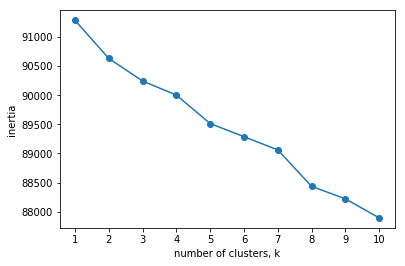

In [65]:
# 1b) plot the inertia values using matplotlib
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

1c) What can you conclude from the elbow method?

since there is no elbow KMeans is not appropriate for the data

2) Visualize your data using T-SNE
* https://campus.datacamp.com/courses/unsupervised-learning-in-python/visualization-with-hierarchical-clustering-and-t-sne?ex=11
* https://www.datacamp.com/community/tutorials/introduction-t-sne


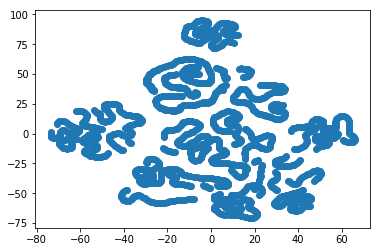

In [43]:
# 2a) plot the T-SNE graph using a learning rate of 200
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(df)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys)
plt.show()

2b) What can you conclude from T-SNE?

That our data fits into about 17 clusters

Note: T-SNE is great, but there is also some controversy on how much you should trust this algorithm:
* [Shortcomings of T-SNE](https://stats.stackexchange.com/questions/270391/should-dimensionality-reduction-for-visualization-be-considered-a-closed-probl)
* [Limitations of T-SNE](https://stats.stackexchange.com/questions/263539/clustering-on-the-output-of-t-sne)

numpy.argsort()

### Kmeans

In [44]:
# 3a) apply k-means to our data with k=10 and print the first 10 words
# that are the most associated with each cluster centroids
# Hint: look at the cluster_centers_ of the KMeans object to find the centroids

kmeans_results = KMeans(n_clusters=10).fit(df)

for n in range(kmeans_results.n_clusters):
    print("Cluster ", n, ": ", end=" ")
    
    centroid = kmeans_results.cluster_centers_[n]
    
    indicies = centroid.argsort()[-11:]
    
    for i in indicies:
        print(vocabulary[i], end=" ")
    
    print(" ")

Cluster  0 :  beaulieu behind dealer began maletroit went god time markheim like denis  
Cluster  1 :  great away poe hawthorne kipling church people town canon minor griffin  
Cluster  2 :  tree treasure much death made point skull upon first parchment one  
Cluster  3 :  chair little table said mildred man hussars white colonel dirkovitch mess  
Cluster  4 :  scarabaeus dis way well beetle negro dat bug massa legrand jupiter  
Cluster  5 :  influence mere spoke long certain however family thus character usher upon  
Cluster  6 :  said maupassant development work every griffin must writing stories short story  
Cluster  7 :  bartram mountain unpardonable fire sin kiln burner man lime brand ethan  
Cluster  8 :  still within low portion usher sound floor chamber door yet upon  
Cluster  9 :  perfect nature would might birthmark wife husband hand cheek georgiana aylmer  


3b) interpret the cluster above; do they make sense to you?

- cluster 0: words around the prompt and study subjects
- cluster 1: words around subjects and testing 
- cluster 2: words around data and analysis

### Hierarchical clustering

4) use hierarchical clustering on the data; feel free to refer to the datacamp lesson below: 
* https://campus.datacamp.com/courses/unsupervised-learning-in-python/visualization-with-hierarchical-clustering-and-t-sne?ex=3

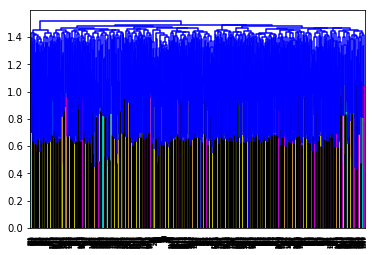

In [45]:
#4a) plot the dendogram using the link above (method = complete)

from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(df, method='complete')

# Plot the dendrogram, using words as labels
dendrogram(mergings,
           leaf_rotation=90,
)
plt.show()

4b) was the dendodram useful?

No; too many words

In [46]:
#4c) we are going to use agglomerative clustering here 
# from the sklean library 

from sklearn.cluster import AgglomerativeClustering
import numpy as np

clustering = AgglomerativeClustering(n_clusters=6).fit(df)

print(clustering)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=6,
            pooling_func='deprecated')


In [47]:
# 4d) compute the center of the cluster
# unfortunately sklearn doesn't provide you with the centroids, but you can use the link below:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html

from sklearn.neighbors.nearest_centroid import NearestCentroid

clf = NearestCentroid()
clf.fit(df, clustering.labels_)

NearestCentroid(metric='euclidean', shrink_threshold=None)

In [48]:
# 4e) print the top 10 words for each cluster centroid

centroids_words = [[] for i in range(6)]

for i in range(0,6):
    for j in range(1,11):
        n = np.argsort(clf.centroids_[i])[-j]
        centroids_words[i].append(df.columns[n])

for i in range(0,6):
    print(i,centroids_words[i])

0 ['denis', 'like', 'man', 'markheim', 'life', 'ethan', 'brand', 'lime', 'began', 'father']
1 ['upon', 'usher', 'yet', 'long', 'thus', 'chamber', 'within', 'walls', 'portion', 'wild']
2 ['story', 'griffin', 'short', 'minor', 'canon', 'stories', 'town', 'church', 'people', 'great']
3 ['jupiter', 'legrand', 'massa', 'bug', 'skull', 'upon', 'tree', 'beetle', 'well', 'parchment']
4 ['aylmer', 'georgiana', 'cheek', 'husband', 'hand', 'birthmark', 'wife', 'might', 'perfect', 'would']
5 ['mess', 'dirkovitch', 'colonel', 'hussars', 'white', 'mildred', 'man', 'little', 'chair', 'regiment']


4f) interpret the cluster above; do they make sense to you?

some of the clusters make sense and have common themes and some do not have an easily distinguishable common thread

### DBScan 

5) Use DBscan (with epsilon=5, min_samples=10) to cluster your data

In [57]:
# 5a) apply DBScan on your data
# Hint: https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html

# from sklearn.cluster import DBSCAN

# db = DBSCAN(eps=.5, min_samples=5).fit(df)
# n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)

In [58]:
# 5b) find the cluster centroid (using the code from question 4d)

# clf_DBScan = NearestCentroid()
# clf_DBScan.fit(df, db.labels_)

In [60]:
# 5c) print the top ten words
# centroids_words_DBScan = [[] for i in range(n_clusters_)]

# for i in range(0,n_clusters_):
#     for j in range(1,11):
#         n = np.argsort(clf_DBScan.centroids_[i])[-j]
#         centroids_words_DBScan[i].append(df.columns[n])

# for i in range(0,n_clusters_):
#     print(i,centroids_words_DBScan[i])

5d) How many clusters do you have? Do they make sense to you? Interpret them below. 

10 clusters

- cluster 0: words around students and learning
- cluster 1: words around student outcomes
- cluster 2: doesn't really have a common thread
- cluster 3: words around testing and scoring

### NMF

6) Use NMF to find topics in our dataset
* https://campus.datacamp.com/courses/unsupervised-learning-in-python/discovering-interpretable-features?ex=3

In [61]:
# 6a) Use the code above to apply the NMF model

from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to df
model.fit(normalize_df(df, method='MinMaxScaler'))


NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=6, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [62]:
# 6b) print the top ten words of each component

num_clusters = 6
centroids_words_NMF = [[] for i in range(num_clusters)]

for i in range(0,num_clusters):
    for j in range(1,11):
        n = np.argsort(model.components_[i])[-j]
        centroids_words_NMF[i].append(df.columns[n])

for i in range(0,num_clusters):
    print(i,centroids_words_NMF[i])

0 ['said', 'one', 'little', 'man', 'could', 'griffin', 'see', 'story', 'time', 'would']
1 ['upon', 'apparently', 'proceeded', 'uplifted', 'sound', 'described', 'ears', 'noise', 'exact', 'mace']
2 ['singular', 'long', 'upon', 'however', 'usher', 'said', 'could', 'character', 'mental', 'family']
3 ['upon', 'door', 'within', 'man', 'long', 'said', 'light', 'looked', 'eyes', 'little']
4 ['even', 'species', 'suffered', 'texture', 'agitation', 'manner', 'spoke', 'certain', 'could', 'said']
5 ['words', 'glowing', 'ghastly', 'well', 'certain', 'vast', 'yet', 'usher', 'convey', 'points']


6c) Interpret the cluster above; how do they compare to kmeans, hierarchical clustering and DBscan?

The groupings are similar but all methods produce slightly different clusters and words within those clusters. When less clusters are produced the words are harder to categorize. 

## Step 10 - Visualizing the results

## Final Step - Putting it all together: 

In [63]:
# in python code, our goal is to recreate the steps above as functions
# so that we can just one line to run topic modeling on a list of 
# documents: 
def ExtractTopicsVSM(documents, numTopics):
    ''' this functions takes in a list of documents (strings), 
        runs topic modeling (as implemented by Sherin, 2013)
        and returns the clustering results, the matrix used 
        for clustering a visualization '''
    
    # step 2: clean up the documents
    documents = clean_list_of_documents(documents)
    
    # step 3: let's build the vocabulary of these docs
    vocabulary = get_vocabulary(documents)
    
    # step 4: we build our list of 100-words overlapping fragments
    documents = flatten_and_overlap(documents)
    
    # step 5: we convert the chunks into a matrix
    matrix = docs_by_words_matrix(documents, vocabulary)
    
    # step 6: we weight the frequency of words (count = 1 + log(count))
    matrix = one_plus_log_mat(matrix, documents, vocabulary)
    
    # step 7: we normalize the matrix
    matrix = normalize(matrix)
    
    # step 8: we compute deviation vectors
    matrix = transform_deviation_vectors(matrix, documents)
    
    # step 9: we apply a clustering algorithm to find topics
    results_clustering = cluster_matrix(matrix)
    
    # step 10: we create a visualization of the topics
    visualization = visualize_clusters(results_clustering, vocabulary)
    
    # finally, we return the clustering results, the matrix, and a visualization
    return results_clustering, matrix, visualization